# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [37]:
import numpy as np
D = np.loadtxt('../data/lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

### 1.

In [38]:
import torch
import matplotlib.pyplot as plt

C:\Users\Elizaveta\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
No handles with labels found to put in legend.


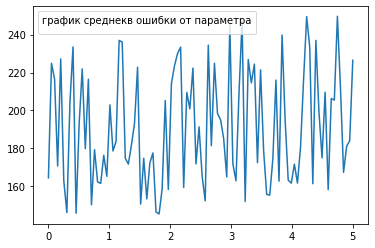

In [39]:
class linRegression(torch.nn.Module):
        def __init__(self, inputSize, outputSize):
            super(linRegression, self).__init__()
            self.linear = torch.nn.Linear(inputSize, outputSize)

        def forward(self, x):
            return self.linear(x)


def learning(decay, XX, YY, testXX, testYY, model = None):

    X_train = XX.reshape(-1, 4)
    Y_train = YY.reshape(-1, 1)
    X_train = torch.tensor(X_train).float()
    Y_train = torch.tensor(Y_train).float()
    X_test = testXX.reshape(-1, 4)
    Y_test = testYY.reshape(-1, 1)
    X_test = torch.tensor(X_test).float()
    Y_test = torch.tensor(Y_test).float()

    inputDim = 4
    outputDim = 1
    learningRate = 0.01
    epochs = 1000
    
    if (model == None):
        model = linRegression(inputDim, outputDim)

    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learningRate, weight_decay=decay)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        predicted = model(X_train).data.numpy()
        loss = criterion(model(X_train), Y_train)
        valLoss = -1
        if testXX != []:
            valLoss = criterion(model(X_test), Y_test)
    return [float(loss.item()), float(valLoss.item())]

model = linRegression(4, 1)

losses = []
valLoses = []
steps = np.linspace(0, 5, 100)
for i in steps:
    have_loss = learning(i, X.copy(), Y.copy(), X.copy(), Y.copy())
    #have_loss = learning(i, X, Y, X, Y)
    valLoses.append(have_loss[1])

plt.plot(steps, valLoses)
plt.legend(title = 'график среднекв ошибки от параметра')

### 2.

In [40]:
k = 5
size_fold = 200

def five_fold(folds):
    lotsoffolds = []
    iteratoring = 0
    for j in range(len(folds)):
        iteratoring += 1
        if (iteratoring == k):
            break
        if (j+5) > len(folds)-1:
            diff = j+5-len(folds)
            buffer = []
            for iter1 in range(j,len(folds)):
                buffer.append(folds[iter1])
            for iter2 in range(diff):
                buffer.append(folds[iter2])
            lotsoffolds.append((buffer[:4],buffer[-1]))
        else:
            buffer = []
            for iter3 in range(j,j+4):
                buffer.append(folds[iter3])
            lotsoffolds.append((buffer[:4],buffer[-1]))
    return lotsoffolds

list_X = []
for i in range(0,len(X),size_fold):
    list_X.append(X[i:i+size_fold])
Xfolds = five_fold(list_X)

list_Y = []
for i in range(0,len(Y),size_fold):
    list_Y.append(Y[i:i+size_fold])
Yfolds = five_fold(list_Y)
        

### 3-5

C:\Users\Elizaveta\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


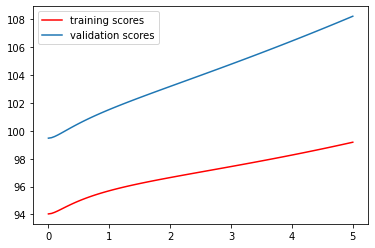

In [41]:
losses = []
steps2 = np.linspace(0, 5, 100)
#from tqdm import tqdm
#for l in tqdm(steps2):
for l in steps2:
    model = linRegression(4, 1)
    ler = None
    for i in range(len(Xfolds)):
        ler = learning(l, np.array(Xfolds[i][0]), np.array(Yfolds[i][0]), np.array(Xfolds[i][1]), np.array(Yfolds[i][1]), model)
    losses.append(ler)
        
trainl = []
testl = []
for loss in losses:
    trainl.append(loss[0])
    testl.append(loss[1])

plt.plot(steps2, trainl, label = 'training scores', color = 'r')
plt.plot(steps2, testl, label = 'validation scores')
plt.legend()

### Зависимости нет. Оптимальный - 0